# Industry - Billionare Analysis between 2000 and 2023
This section focuses on analyzing the role of various industries in contributing to the immense wealth of billionaires. We've used Forbes time series data from 2000 to 2023, which includes industry-specific information of billionaires. Our main goal is to identify which industries have been most influential in creating extreme wealth, how industry trends have evolved over time.

## Importing Libraries & Datasets

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.spatial import distance
import mplcyberpunk
plt.style.use("cyberpunk")
import ast

In [87]:
url_2023 = 'billionaires_2023.csv'
url_2024 = 'billionaires_2024.csv'
url_2020_2023 = 'billionaires_2000_2023.csv'

# main data
dataset_2023 = pd.read_csv(url_2023)
dataset_2000_2023 = pd.read_csv(url_2020_2023)
dataset_2024 = pd.read_csv(url_2024)

## Extreme Wealth in Time Series Data (2000-2023)
To gain a comprehensive perspective on extreme wealth, we chose the new millennium as a starting point due to the greater consistency in data. Our primary focus is to analyze the trend from 2000 to 2023. The graph clearly illustrates a significant increase during these years, with billionaires amassing over 12 trillion USD in wealth. To put this figure into context, consider that the third-largest economy in the world had a GDP of approximately 5 trillion USD. This implies that the collective wealth of these billionaires surpasses double the size of Japan's entire annual economic output, as well as the U.S. federal budget for the fiscal year 2021, which was around 6.8 trillion USD.

A closer examination of the trend reveals several pivotal changes. The first occurred in 2008 when individuals with extreme wealth lost nearly 30% of their fortunes during the Global Financial Crisis. Another noticeable dip occurred in 2016. However, the most striking development was observed during the Global Pandemic, with an almost 60% surge in wealth in 2021, followed by a declining trend thereafter.



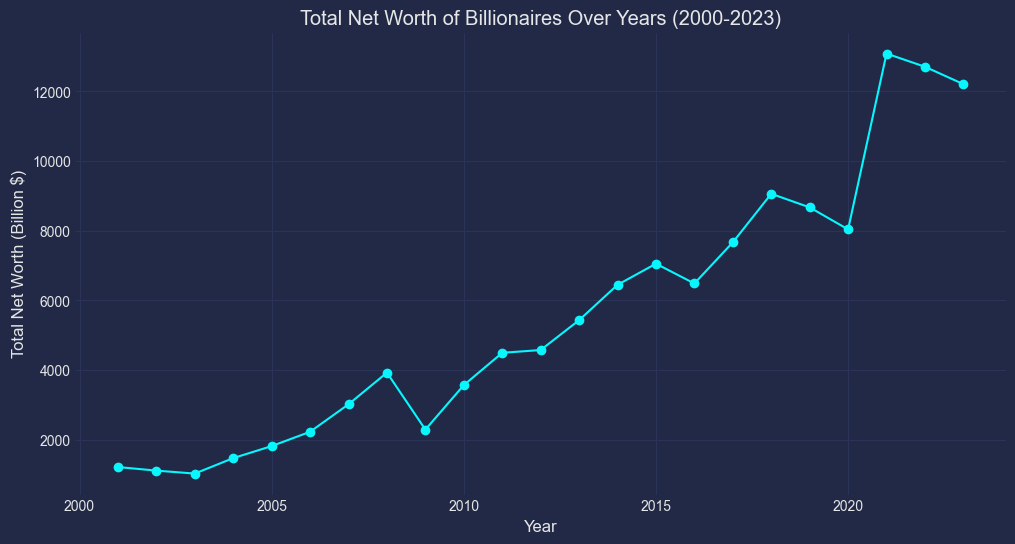

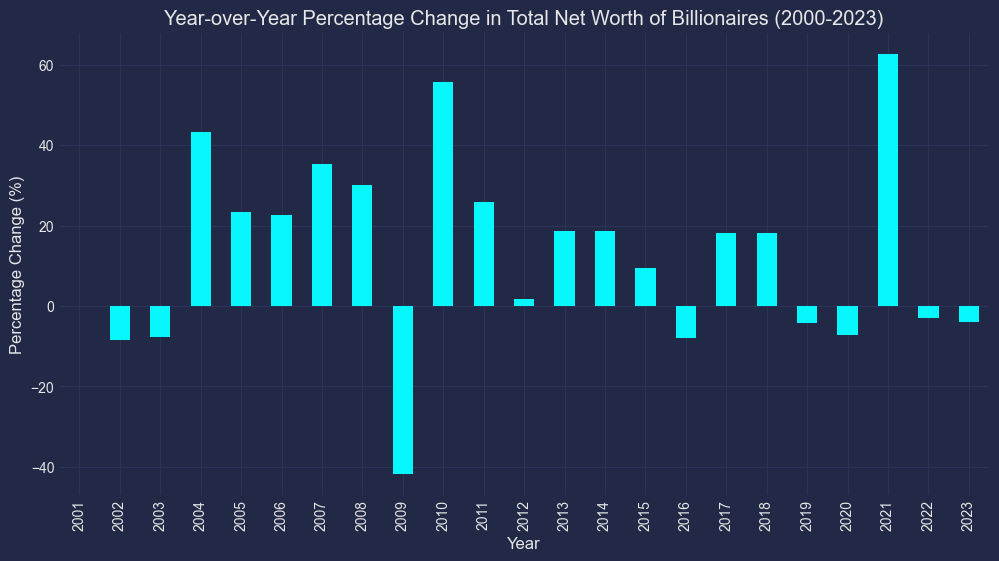

In [88]:
# Convert Net Worth to numeric
dataset_2000_2023['net_worth'] = dataset_2000_2023['net_worth'].replace({'\$': '', ' B': ''}, regex=True).astype(float)

# Filter data for years between 2000 and 2023
filtered_data = dataset_2000_2023[(dataset_2000_2023['year'] >= 2001) & (dataset_2000_2023['year'] <= 2023)]

# Group by year and sum net worth
yearly_total = filtered_data.groupby('year')['net_worth'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_total.index, yearly_total.values, marker='o')
plt.title('Total Net Worth of Billionaires Over Years (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Total Net Worth (Billion $)')
plt.grid(True)
plt.show()

# Calculate the percentage change year over year
yearly_change = yearly_total.pct_change() * 100  # Convert to percentage
# Optional: Plotting the percentage change
plt.figure(figsize=(12, 6))
yearly_change.plot(kind='bar')
plt.title('Year-over-Year Percentage Change in Total Net Worth of Billionaires (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

/var/folders/p5/9pt_428x1_58kc40jyglstlh0000gn/T/ipykernel_80743/3085017733.py:103: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(industries)).colors  # 'tab20' colormap has 20 unique colors


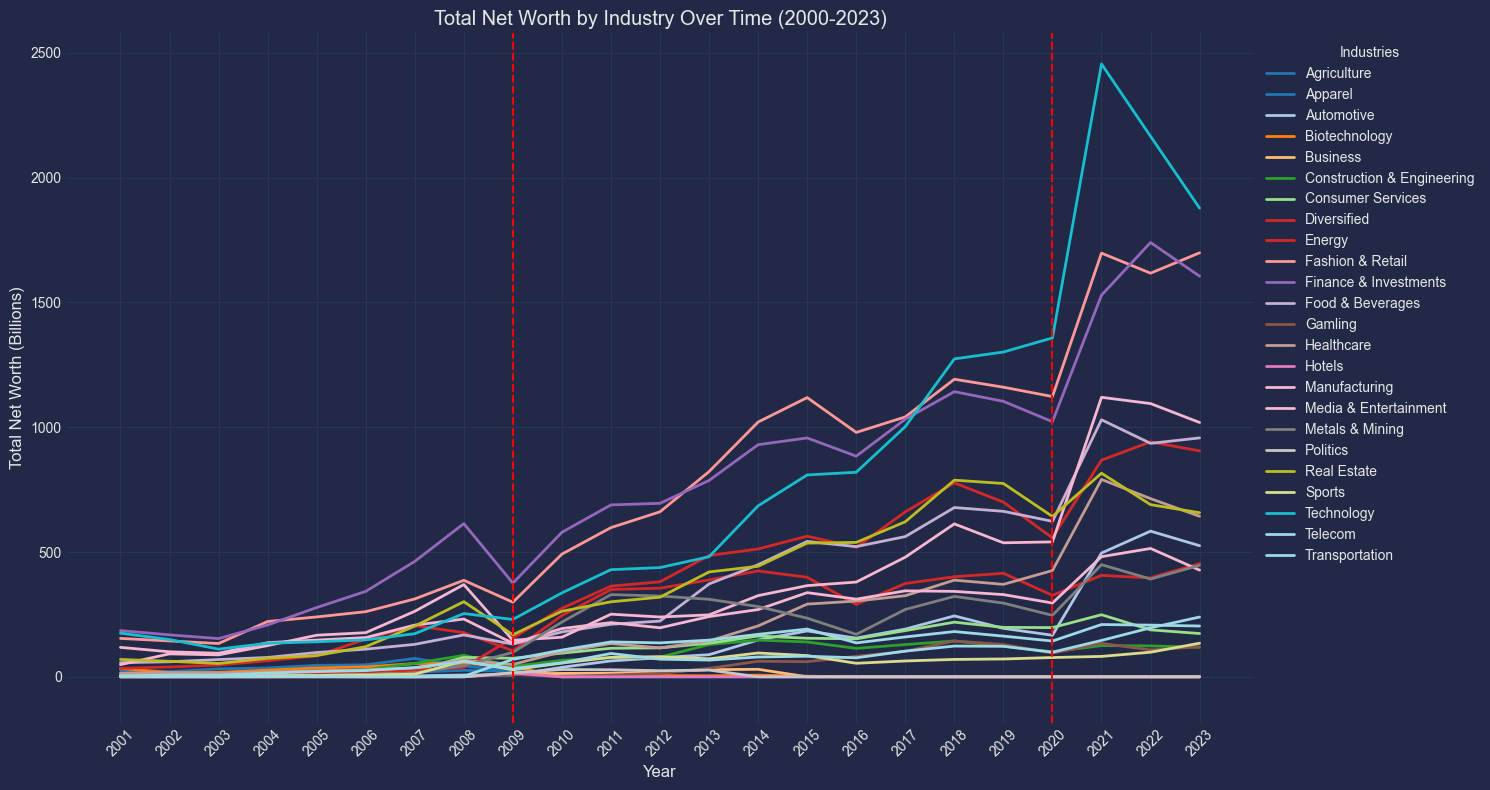

In [89]:
dataset2000_2023 = pd.read_csv('billionaires_2000_2023.csv')
dataset2000_2023 = dataset2000_2023[['year', 'full_name', 'net_worth', 'country_of_citizenship','business_industries']].dropna()

def process_business_industries(row):
    # Check if the value in the 'business_industries' column is a string
    if isinstance(row['business_industries'], str):
        try:
            # Attempt to parse the string representation of the list
            industries_list = ast.literal_eval(row['business_industries'])
            # Check if it's a list and get the first value if available
            if isinstance(industries_list, list) and len(industries_list) > 0:
                return industries_list[0]
            else:
                return None  # Return None if not a list or list is empty
        except (ValueError, SyntaxError):
            return None  # Return None if parsing fails
    else:
        return row['business_industries']  # If it's already a non-string type, return it as is

# Apply the custom function to the 'business_industries' column
dataset2000_2023['business_industries'] = dataset2000_2023.apply(process_business_industries, axis=1)

def standardize_industries(df):
    # Replace HTML entities
    df['business_industries'] = df['business_industries'].str.replace('&#38;', '&', regex=False)

    # Define a dictionary for conditions and replacements
    replacements = {
        'Construction': 'Construction & Engineering',
        'Food': 'Food & Beverages',
        'Energy': 'Energy',
        'Retail': 'Fashion & Retail',
        'Finance': 'Finance & Investments',
        'Health': 'Healthcare',
        "Hotels": "Hotels",
        "Internet": 'Technology',
        "Investments": "Finance & Investments",
        'Food': 'Food & Beverage',
        'Media': 'Media & Entertainment',
        'Metals': 'Metals & Mining',
        'Real': 'Real Estate',
        'Software': 'Technology',
        'Technology': 'Technology',
        'Sports': 'Sports',
        'Telecom': 'Telecom',
        'Billionaire': "Diversified",
        'Beverage': 'Food & Beverages',
        'Services': 'Consumer Services',
        'Consumer': 'Consumer Services',
        'Casino':'Gamling',
        'Steel':'Metals & Mining',
        'Coal': 'Metals & Mining',
        'Service': 'Consumer Services',
        'Healthcare': 'Insurance',
        'Gaming': 'Sports',
        'Insurance': 'Healthcare',
        'Pharmaceuticals': 'Biotechnology',
        'Medicine': 'Biotechnology',
        'Oil': 'Energy',
        'Luxury Goods': 'Fashion & Retail',
        'Banks': 'Finance & Investments',
        'Celebrity': 'Media & Entertainment',
        'Shipping': 'Logistics',
        'Logistics': 'Transportation',
        'Electronics': 'Technology',
        'Chemicals': 'Metals & Mining',
        'Gambling': 'Sports',
        'Leisure': 'Hotels',

        # Add more conditions here as needed
    }

    # Iterate over the dictionary and replace values conditionally
    for key, value in replacements.items():
        df['business_industries'] = df['business_industries'].apply(
            lambda x: value if key in x else x
        )

    # Optionally, standardize to remove trailing whitespaces
    df['business_industries'] = df['business_industries'].str.strip()

    return df

standardize_industries(dataset2000_2023)

# Convert 'net_worth' to numeric
dataset2000_2023['net_worth'] = dataset2000_2023['net_worth'].str.rstrip('B').astype(float)

# Filter data for years between 2000 and 2022
filtered_df = dataset2000_2023[(dataset2000_2023['year'] >= 2001) & (dataset2000_2023['year'] <= 2023)]

# Group by 'year' and 'business_industries', and calculate the total net worth
industry_yearly_sum = filtered_df.groupby(['year', 'business_industries'])['net_worth'].sum().reset_index()

# Create a pivot table
pivot_table = industry_yearly_sum.pivot(index='year', columns='business_industries', values='net_worth').fillna(0)

# Sort industries within each year in ascending order
sorted_pivot_table = pivot_table.apply(lambda x: x.sort_values(ascending=True), axis=1)

# Generate a color palette with a unique color for each industry
industries = pivot_table.columns
colors = plt.cm.get_cmap('tab20', len(industries)).colors  # 'tab20' colormap has 20 unique colors

# Ensure years are treated as categorical variables and set the x-ticks)
pivot_table.index = pivot_table.index.astype(str)

# Set the figure size
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

num_colors = len(pivot_table.columns)
cm = plt.get_cmap('tab20')
colors = cm(np.linspace(0, 1, num_colors))

# Plot each industry as a separate line
for column, color in zip(pivot_table.columns, colors):
    plt.plot(pivot_table.index, pivot_table[column], marker='', color=color, linewidth=2, label=column)

# Set the title and labels
plt.title('Total Net Worth by Industry Over Time (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Total Net Worth (Billions)')

# Add grid lines to the plot for better readability
plt.grid(True)

# Adjust y-axis limits to position zero slightly below the middle
y_min, y_max = plt.ylim()
if y_min < 0:
    plt.ylim(bottom=y_min * 1.5)  # Adjust the lower bound if necessary

# Add a legend to the plot
# Adjust the location of the legend. If there are many industries, you might need to place the legend outside the plot.
plt.legend(title='Industries', loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the x-axis labels (years) are displayed correctly and are readable
plt.xticks(rotation=45)

# Add red vertical lines for the years 2009, 2016, and 2020
plt.axvline(x='2009', color='red', linestyle='--')
plt.axvline(x='2020', color='red', linestyle='--')

# Show the plot
plt.tight_layout()  # This will adjust the plotting area to fit all labels and legends properly
plt.show()


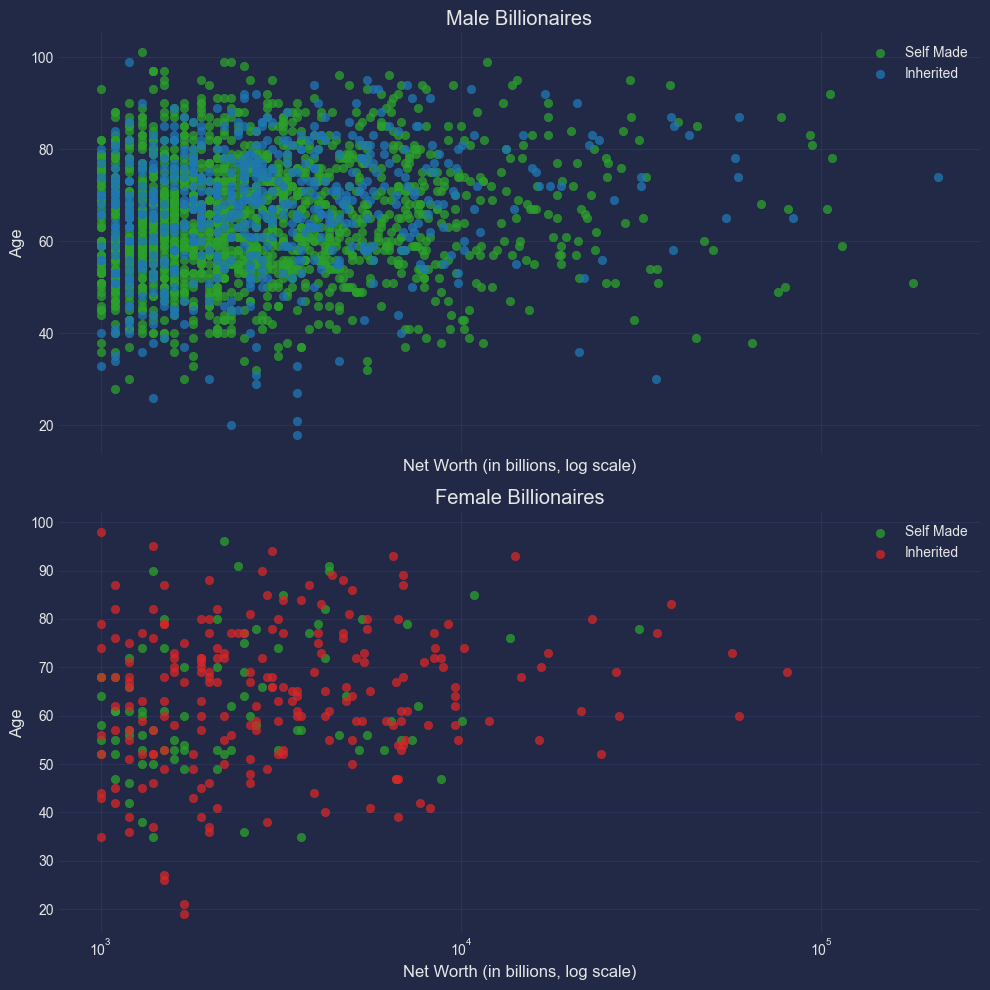

In [85]:
dataset_2023_gender = dataset_2023.copy()

# Filter data based on gender and drop rows with missing 'finalWorth' or 'age'
male_data = dataset_2023_gender[dataset_2023_gender['gender'] == 'M'][['personName', 'finalWorth', 'age', 'selfMade']].dropna()
female_data = dataset_2023_gender[dataset_2023_gender['gender'] == 'F'][['personName', 'finalWorth', 'age', 'selfMade']].dropna()

# Creating a 2x1 subplot matrix with log scale for net worth on the x-axis
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Define a color map for self-made status
color_map = {True: '#2CA02C', False: '#1F77B4'}

# Plotting male billionaires, color by self-made status
for self_made_status, color in color_map.items():
    subset = male_data[male_data['selfMade'] == self_made_status]
    label = 'Self Made' if self_made_status else 'Inherited'
    axes[0].scatter(subset['finalWorth'], subset['age'], c=color, alpha=0.75, label=label)

# Setting labels and scale for male billionaires
axes[0].set_title('Male Billionaires')
axes[0].set_ylabel('Age')
axes[0].set_xscale('log')
axes[0].set_xlabel('Net Worth (in billions, log scale)')
axes[0].legend()

# Plotting female billionaires, color by self-made status
color_map = {True: '#2CA02C', False: '#D62728'}
for self_made_status, color in color_map.items():
    subset = female_data[female_data['selfMade'] == self_made_status]
    label = 'Self Made' if self_made_status else 'Inherited'
    axes[1].scatter(subset['finalWorth'], subset['age'], c=color, alpha=0.75, label=label)

# Setting labels for female billionaires
axes[1].set_title('Female Billionaires')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Net Worth (in billions, log scale)')
axes[1].legend()

plt.tight_layout()
plt.show()